# Django 6일차

### 인증과 권한

<b>개요</b>  

Django authentication system(인증 시스템)은 <mark>인증(Autentication)</mark>과<br> <mark>권한(Authorization)</mark> 부여를 함께 제공(처리)하며, 이러한 기능을 일반적으로<br> 인증시스템이라고 함

필수 구성은 settings.py에 이미 포함되어 있으며 INSTALLED_APPS에서 확인 가능

- **django.contrib.auth**

- **Authentication (인증)**
    - 신원 확인
    - 사용자가 자신이 누구인지 확인하는 것

- **Authorization (권한, 허가)**
    - 권한 부여
    - 인증된 사용자가 수행할 수 있는 작업을 결정  

&nbsp;

<b>사전 설정</b>

두 번째 app accounts 생성 및 등록  

```
$ python manage.py startapp acounts
```

```
# settings.py

INSTALLED_APPS = [
    'articles',
    'accounts',
    ...
]

```
- <font color="red">auto와 관련된 경로나 키워드들은 Django 내부적으로 accounts라는 이름으로 사용하고 있기 때문에 <br> 되도록 accounts로 지정하는 것을 권장 </font>
- <font color="red">다른 이름으로 설정해도 되지만 나중에 추가 설정을 해야 할 일들이 생기게 됨</font>  

&nbsp;

url 분리 및 매핑  

```
# accounts/urls.py

from django.urls import path
from . import views

app_name = "accounts"
urlpatterns = [

]


# crud/urls.py
urlpatterns = [
    ...,
    path("accounts/", include("accounts.urls")),
]
```

### Custom User model

<b>"Custom User Model로 <mark>대체하기</mark>"</b>  

기본 User Model을 필수적으로 Custom User model로 대체하는 이유 이해하기  

Django는 기본적인 인증 시스템과 여러가지 필드가 포함된 User MOdel을 제공,  
대부분의 개발자 환경에서 기본 User Model을 Custom User Model로 대체함  

&nbsp;

<b>개요</b>  

개발자들이 작성하는 일부 프로젝트에서는 django에서 제공하는  
built-in User model의 기본 인증 요구사항이 적절하지 않을 수 있음  

- 예를 들어, 내 서비스에서 회원가입 시 username 대신 email을 식별 값을 사용하는 것이 더 적합한 사이트인 경우  
- Django의 User Model은 기본적으로 username를 식별 값으로 사용하기 때문에 적합하지 않음  

Django는 현재 프로젝트에서 사용할 User Model을 결정하는 <mark>AUTO_USER_MODEL</mark>  
설정 값으로 Default User Model을 재정의 (override)할 수 있도록 함  

<b>AUTO_USER_MODEL</b>  

프로젝트에서 User를 나타낼 때 사용하는 모델  

프로젝트가 진행되는 동안 (모델을 만들고 마이그레이션 한 후) 변경할 수 없음  

프로젝트 시작시 설정하기 위한 것이며, 참조하는 모델은 첫 번째 마이그레이션에서 사용할 수 있어야 함  
- 즉, 첫 번째 마이그레이션 전에 확정 지어야 하는 값  

다음과 같은 기본 값을 가지고 있음  

```
# settings.py

AUTH_USER_MODEL = 'auth.User'
```


### How to substituting a custom User model  

<b>개요</b>  

"custom User model로 대체하기"  

대체하는 과정을 외우기 어려울 경우 해당 공식 문서를 보면 순서대로 진행하는 것을 권장
<a href='https://docs.djangoproject.com/en/4.1/topics/auth/customizing/#substituting-acustom-user-model'>https://docs.djangoproject.com/en/4.1/topics/auth/customizing/#substituting-acustom-user-model</a>

<b>대체하기</b>  

AbstractUser를 상속받는 Custom User class 작성  

기존 User 클래스도 AbstractUser를 상속받기 때문에 커스텀 User 클래스도 완전히 같은 모습을 가지게 됨  
<a href= "https://github.com/django/django/blob/main/django/contrib/auth/models.py#L405">https://github.com/django/django/blob/main/django/contrib/auth/models.py#L405</a>  

&nbsp;

Django 프로젝트에서 User를 나타내는데 사용하는 모델을 방금 생성한 커스텀 User 모델로 지정  

```
# settings.py

AUTH_USER_MODEL = 'acccounts.User'
```

&nbsp;

admin.py에 커스텀 User 모델을 등록  
- 기본 User 모델이 아니기 때문에 등록하지 않으면 admin site에 출력되지 않음  

```
# accounts/admin.py

from django.contrib import admin
from django.contrib.auth.admin import UserAdmin
from .models import User

# Register your models here.
admin.site.register(User, UserAdmin)

```

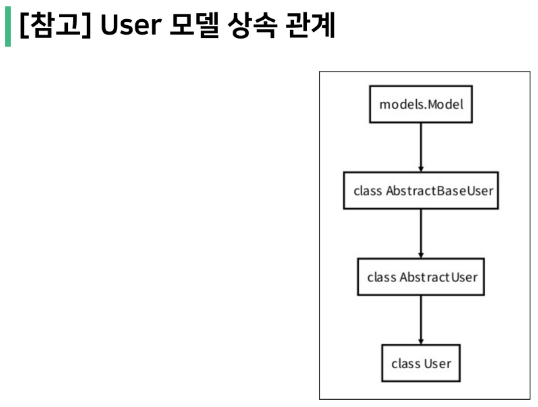

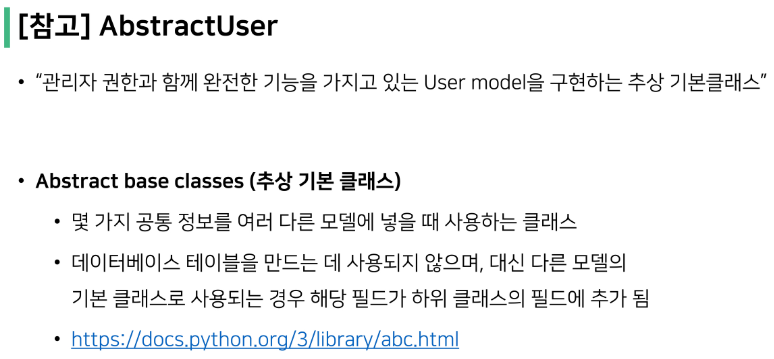

<b>[주의] 프로젝트 중간에 AUTH_USER_MODEL 변경하기</b>  

모델 관계에 영향을 미치기 때문에 훨씬 더 어려운 작업이 필요  

예를 들면 변경사항이 자동으로 수행될 수 없기 때문에 DB 스키마를  
직접 수정하고, 이전 사용자 테이블에서 데이터를 이동하고,  
일부 마이그레이션을 수동으로 다시 적용해야 하는 등..  

결론은 중간 변경은 권장하지 않음 <mark>(프로젝트 처음에 진행하기)</mark>

<b>데이터베이스 초기화</b>  

수업 진행을 위한 데이터베이스 초기화 후 마이그레이션(프로젝트 중간일 경우)  

1. migrations 파일 삭제
- migrations 폴더 및 \_\_init\_\_.py는 삭제 하지 않음
- 번호가 붙은 파일만 삭제

2. db.sqlite3 삭제  

3. migrations 진행
- makemigrations
- migrate



<b>custom User로 변경된 테이블 확인</b>  

이제 auth_user 테이블이 아니라 accounts_user 테이블을 사용하게 됨  

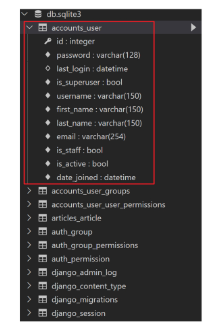

<b>반드시 User 모델을 대체해야 할까?</b>  

Django는 새 프로젝트를 시작하는 겨우 비록 기본 User 모델이 충분하더라도  
커스텀 User 모델을 설정하는 것을 <mark>강력하게 권장(highly recommended)</mark>  

커스텀 User 모델은 <mark>기본 user 모델과 동일하게 작동 하면서도 <br> 필요한 경우 나중에 맞춤 설정할 수 있기 때문</mark>  

- 단, User 모델 대체 작업은 프로젝트의 모든 migrations 혹은 첫 migrate를 실행하기 전에 이 작업을 마쳐야 함  

### HTTP

<b>HTTP</b>  

Hyper Text Transfer Protocol  

HTML 문서와 같은 리소스들을 가져올 수 있도록 해주는 프로토콜(규칙, 규약)  

웹(WWW)에서 이루어지는 모든 데이터 교환의 기초  

클라이언트-서버 프로토콜이라고도 부름  

&nbsp;

<b>요청과 응답</b>  

요청(request)  
- 클라이언트(브라우저)에 의해 전송되는 메시지

응답(response)  
- 서버에서 응답으로 전송되는 메시지

&nbsp;

<b>HTTP 특징</b>  

1. 비 연결 지향(connectionless)
- 서버는 요청에 대한 응답을 본낸 후 연결을 끊음
    - 예를 들어 우리가 네이버 메인 페이지를 보고 있을 때 우리는 네이버 서버와 연결되어 있는 것이 아님  
    - 네이버 서버는 우리에게 메인 페이지를 응답하고 연결을 끊는 것  

2. 무상태(stateless)
- 연결을 끊는 순간 클라이언트와 서버 간의 통신이 끝나며 상태 정보가 유지되지 않음  
- 클라이언트와 서버가 주고받는 메시지들은 서로 완전히 독립적  

&nbsp;

<b>어떻게 로그인 상태를 유지할까?</b>  

그런데 우리가 로그인을 하고 웹 사이트를 사용할 때 페이지를 이동해도 로그인 "상태"가 유지됨  

서버와 클라이언트 간 지속적인 상태 유지를 위해 <mark>"쿠키와 세션"</mark>이 존재함

# 쿠키(Cookie)  

<b>개요</b>  

HTTP 쿠키는 <mark>상태가 있는 세션</mark>을 만들도록 해 줌  

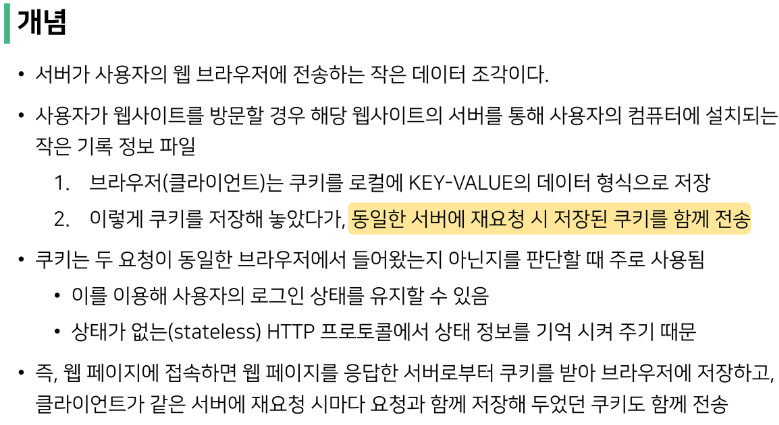

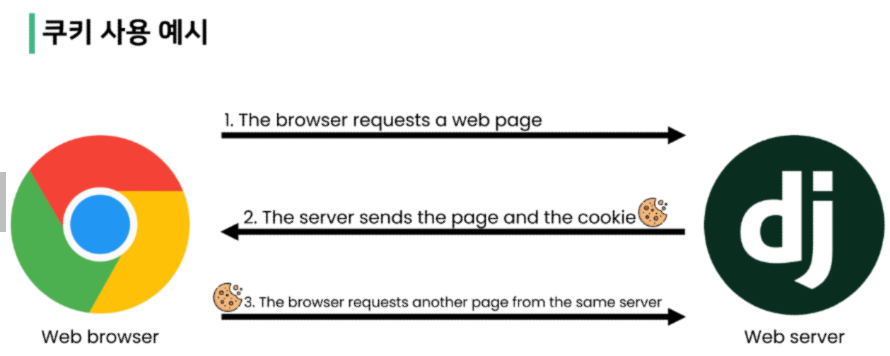

<b>쿠키 사용 목적</b>  

1. 세션 관리(Session management)  
- 로그인, 아이디 자동완성, 공지 하루 안 보기, 팝업 체크, 장바구니 등의 정보 관리  
- 개발자 도구의 Application 탭을 활용할 것!

2. 개인화 (Personalization)  
- 사용자 선호, 테마 등의 설정  

3. 트래킹(Tracking)  
- 사용자의 행동을 기록 및 분석  



<b>세션(Session)</b>  

사이트와 특정 브라우저 사이의 "state(상태)"를 유지시키는 것  

클라이언트가 서버에 접속하면 서버가 특정 session id를 발급하고,  
클라이언트는 seesion id를 쿠키에 저장  

- 클라이언트가 다시 동일한 서버에게 접속하면 요청과 함께 쿠키(session id가 저장된)서버에 전달  
- 쿠키는 요청 때마다 서버에 함께 전송되므로 서버에서 session id를 확인해 알맞은 로직을 처리  

session id는 세션을 구별하기 위해 필요하며, 쿠키에는 session id만 저장


<b>쿠키 Lifetime(수명)</b>  

1. Session cookie  
- 현재 세션(current session)이 종료되면 삭제됨  
- 브라우저 종료와 함께 세션이 삭제됨  

2. Persistent cookies
- Expires 속성에 지정된 날짜 혹은 MAX-Age 속성에 지정된 기간이 지나면 삭제됨  

&nbsp;

<b>Session in Django</b>  

Django는 <mark>database-backed sessions 저장 방식</mark>을 기본 값으로 사용  
- session 정보는 Django DB의 <mark>django_session 테이블</mark>에 저장  

Django는 특정 session id를 포함하는 쿠키를 사용해서 각각의 브라우저와 사이트가 연결된 session을 알아냄  

Django는 우리가 session 메커니즘(복잡한 동작원리)에 대부분을 생각하지 않게끔 많은 도움을 줌  

### Authentication in Web requests

<b>개요</b>  

Django가 제공하는 인증 관련 built-in forms 익히기

<a href="https://docs.djangoproject.com/en/4.1/topics/auth/default/#module-django.contrib.auth.forms">https://docs.djangoproject.com/en/4.1/topics/auth/default/#module-django.contrib.auth.forms</a>

### Login

<b>개요</b>  

로그인은 <mark>Session을 Create</mark>하는 과정  

&nbsp;

<b>AuthenticaitonForm</b>  

로그인을 위한 built-in form  
- 로그인 하고자 하는 사용자의 정보를 입력 받음  
- 기본적으로 username과 password를 받아 데이터가 유효한지 검증  

request를 첫 번째 인자로 취함  
<a href="https://github.com/django/django/blob/main/django/contrib/auth/models.py#L174">https://github.com/django/django/blob/main/django/contrib/auth/models.py#L174</a>

<b>로그인 페이지 작성</b>  

```
# accounts/urls.py

from django.urls import path
from . import views

app_name = 'accounts'

urlpatterns = [
    path('login/', views.login, name = 'login'),
]


# accounts/templates/accounts/login.html

{% extends 'base.html' %}

{% block content %}
  <h1>Login</h1>
  <form action="{% url 'accounts:login' %}" method="POST">
    {% csrf_token %}
    {{ form.as_p }}
    <input type="submit" value = "Login">
  </form>
{% endblock content %}


# accounts/views.py
from django.contrib.auth.forms import AuthenticationForm
...

def login(request):
    if request.method == "POST":
        form = AuthenticationForm(request, request.POST)
        if form.is_valid():
            auth_login(request, form.get_user())
            return redirect('articles:index')
    else:
        form = AuthenticationForm()
    
    context = {'form': form, }
    return render(request, 'accounts/login.html', context)
```

<b>login()</b>  

```
login(request, user, backend=None)
```
인증된 사용자를 로그인 시키는 로직으로 view 함수에서 사용됨  

현재 세션에 연결하는 인증된 사용자가 있는 경우 사용  

HttpRequest 객체와 User 객체가 필요함  

&nbsp;

<b>로그인 로직 작성</b>  

로그인 페이지 작성  

view 함수 login과의 충돌을 방지하기 위한 import한 login 함수 이름을 auth_login으로 변경해서 사용  

```
from django.contrib.auth import login as auth_login
```

<b>get_user()</b>  

AuthenticationForm의 인스턴스 메서드  

유효성 검사를 통과했을 경우 로그인한 사용자의 객체를 반환  
<a href="https://github.com/django/django/blob/main/django/contrib/auth/models.py#L244">https://github.com/django/django/blob/main/django/contrib/auth/models.py#L244</a>


<b>세션 데이터 확인하기</b>  

로그인 후 개발자 도구와 DB에서 django로부터 발급 받은 세션 확인  
(로그인은 관리자 계정을 만든 후 진행)  

&nbsp;

<b>로그인 링크 작성</b>  

실습의 편의를 위해 base templates에 로그인 페이지로 이동할 수 있는 하이퍼링크 작성

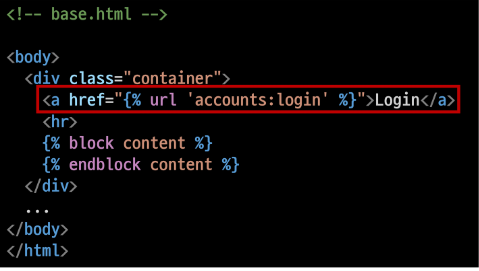

### Authentication with User

<b>개요</b>  

템플릿에서 인증 관련 데이터를 출력하는 방법  

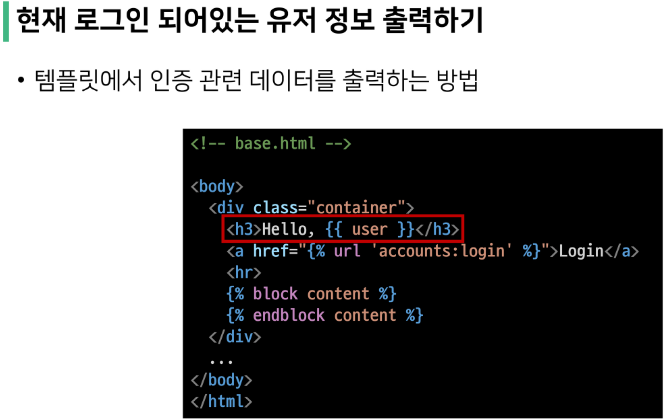

어떻게 base templates에서 context 데이터 없이 user 변수를 사용할 수 있는 걸까?  

settings.py의 <mark>context processors</mark>설정 값 때문

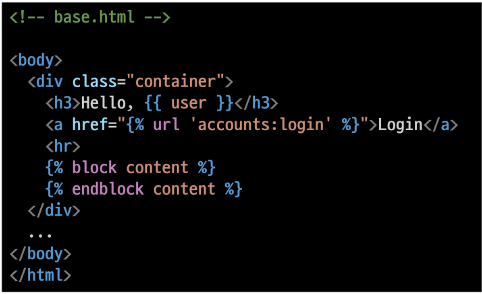

<b>context processors</b>  

템플릿이 렌더링 될 때 호출 가능한 컨텍스 데이터 목록  

작성된 컨텍스트 데이터는 기본적으로 템플릿에서 사용 가능한 변수로 포함됨  

즉, django에서 자주 사용하는 데이터 목록을 미리 템플릿에 로드해 둔 것 

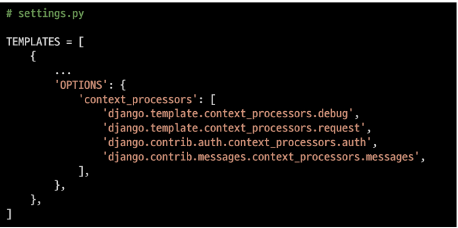

&nbsp;

현재 user 변수를 담당하는 프로세서는 django.contrib.auth.context_processors.auth  

이외에 더 많은 built-in template context processors들은 공식 문서를 참고

<a href="https://docs.djangoproject.com/en/4.1/ref/templates/api/#built-in-template-context-processors">https://docs.djangoproject.com/en/4.1/ref/templates/api/#built-in-template-context-processors</a>


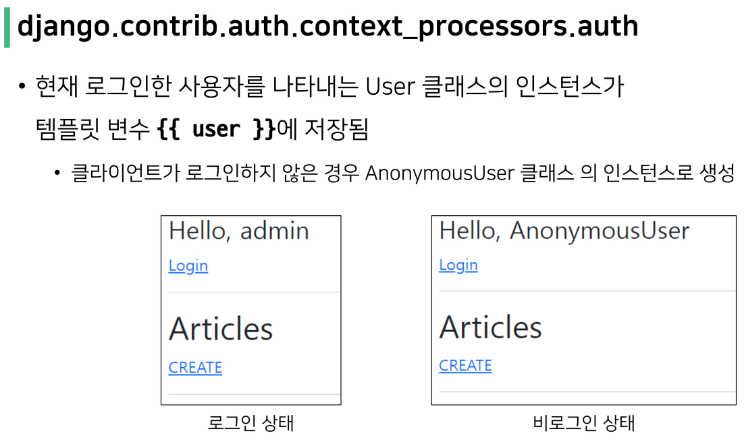

### Logout

<b>개요</b>

로그아웃은 <mark>Session을 Delete</mark>하는 과정  

&nbsp;

<b>logout()</b>  

```
logout(request)
```

HttpRequest 객체를 인자로 받고 반환 값이 없음  

사용자가 로그인하지 않은 경우 오류를 발생시키지 않음  

다음 2가지 일을 처리한다.  

1. 현재 요청에 대한 session data를 DB에서 삭제  
2. 클라이언트의 쿠키에서도 sessionid를 삭제  
- 이는 다른 사람이 동일한 웹 브라우저를 사용하여 로그인하고, 이전 사용자는 세션 데이터에 액세스하는 것을 방지하기 위함  

<b>로그아웃 로직 작성하기</b>   

```
# accounts/urls.py

from django.urls import path
from . import views

app_name = 'accounts'

urlpatterns = [
    path('login/', views.login, name = 'login'),
    path('logout/', views.logout, name = 'logout'),
]


# accounts/views.py

from django.shortcuts import render, redirect
from django.contrib.auth.forms import AuthenticationForm
from django.contrib.auth import login as auth_login
from django.contrib.auth import logout as auth_logout

def logout(request):
    auth_logout(request)
    return redirect('articles:index')


# templates/base.html

...
    <form action="{% url 'accounts:logout' %}" method = "POST">
        {% csrf_token %}
        <input type="submit" value = "logout">
    </form>

...

```

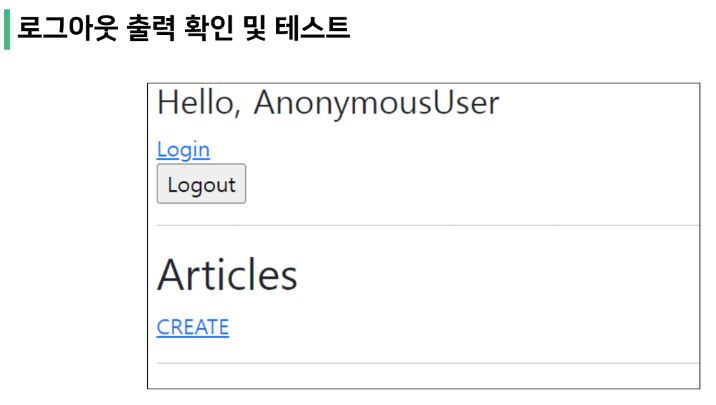